# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Magnetization" data-toc-modified-id="Magnetization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Magnetization</a></div><div class="lev1 toc-item"><a href="#Autocorrelation" data-toc-modified-id="Autocorrelation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Autocorrelation</a></div><div class="lev1 toc-item"><a href="#$\langle-m-\rangle$(T)" data-toc-modified-id="$\langle-m-\rangle$(T)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-2-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>&amp;#x27E8;</mo><mi>m</mi><mo fence=&quot;false&quot; stretchy=&quot;false&quot;>&amp;#x27E9;</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-6" role="math" style="width: 1.856em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.538em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.723em, 1001.46em, 2.841em, -1000em); top: -2.532em; left: 0em;"><span class="mrow" id="MathJax-Span-7"><span class="mo" id="MathJax-Span-8" style="font-family: STIXMathJax_Main;">⟨</span><span class="mi" id="MathJax-Span-9" style="font-family: STIXMathJax_Main; font-style: italic;">m</span><span class="mo" id="MathJax-Span-10" style="font-family: STIXMathJax_Main;">⟩</span></span><span style="display: inline-block; width: 0px; height: 2.532em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.294em; border-left: 0px solid; width: 0px; height: 1.188em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mo fence="false" stretchy="false">⟨</mo><mi>m</mi><mo fence="false" stretchy="false">⟩</mo></math></span></span><script type="math/tex" id="MathJax-Element-2">\langle m \rangle</script>(T)</a></div><div class="lev1 toc-item"><a href="#$\chi(T)$" data-toc-modified-id="$\chi(T)$-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" id="MathJax-Element-4-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>&amp;#x03C7;</mi><mo stretchy=&quot;false&quot;>(</mo><mi>T</mi><mo stretchy=&quot;false&quot;>)</mo></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-16" role="math" style="width: 2.163em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.795em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.76em, 1001.75em, 2.835em, -1000em); top: -2.532em; left: 0em;"><span class="mrow" id="MathJax-Span-17"><span class="mi" id="MathJax-Span-18" style="font-family: STIXMathJax_Main; font-style: italic;">χ<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.041em;"></span></span><span class="mo" id="MathJax-Span-19" style="font-family: STIXMathJax_Main;">(</span><span class="mi" id="MathJax-Span-20" style="font-family: STIXMathJax_Main; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.077em;"></span></span><span class="mo" id="MathJax-Span-21" style="font-family: STIXMathJax_Main;">)</span></span><span style="display: inline-block; width: 0px; height: 2.532em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.287em; border-left: 0px solid; width: 0px; height: 1.137em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>χ</mi><mo stretchy="false">(</mo><mi>T</mi><mo stretchy="false">)</mo></math></span></span><script type="math/tex" id="MathJax-Element-4">\chi(T)</script></a></div><div class="lev1 toc-item"><a href="#Finitse-size-scaling" data-toc-modified-id="Finitse-size-scaling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finitse-size scaling</a></div>

In [115]:
%matplotlib inline
import sys
sys.path.insert(0, '../script')
import matplotlib.pyplot as plt
import numpy as np
from fileoperations import ReadFile, SplitData
import os
import random as rand

In [4]:
data_dir = "../data/"

In [118]:
# Mac
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["font.size"] = 20

In [116]:
#unfinished
def Bootstrap(n, data, func, *args):
    N = data.size
    rand.seed(600)
    values = []
    for i in range(0, n):
        new_data = []
        for i in range(0, N):
            new_data.append(data[rand.randint(0, N-1)])
        new_data = np.array(new_data, dtype=np.float64)
        values.append(func(new_data, *args))
    print(values)

# Magnetization

{'L': 60.0, 'T': 0.5}
[    8.   -56.   -70. ...,  1660.  1670.  1672.]


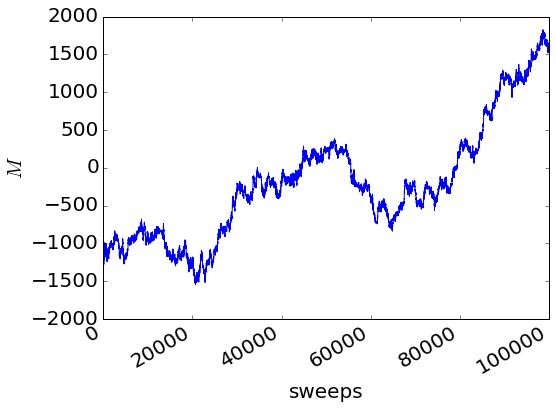

In [101]:
header, [t, E, M] = ReadFile(data_dir + "M_60_0.500.dat", 1, " ")
print(header)
print(M)
fig, ax = plt.subplots()
ax.set_xlabel("sweeps")
ax.set_ylabel(r"$M$")
ax.plot(t, M)
fig.autofmt_xdate()
plt.show()

{'L': 50.0, 'T': 2.0}
[ -112.  -226.  -332. ..., -2272. -2268. -2286.]


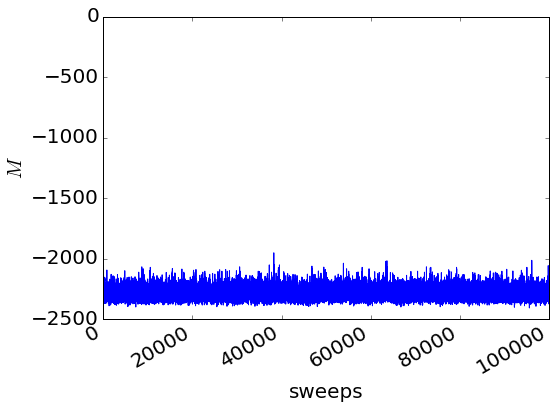

In [100]:
header, [t, E, M] = ReadFile(data_dir + "M_50_2.000.dat", 1, " ")
print(header)
print(M)
fig, ax = plt.subplots()
ax.set_xlabel("sweeps")
ax.set_ylabel(r"$M$")
ax.plot(t, M)
fig.autofmt_xdate()
plt.show()

# Autocorrelation

{'L': 100.0, 'T': 1.5}
[ 0.23362605  0.2336166   0.23360798 ..., -0.11425459 -0.11425469
 -0.11425479]


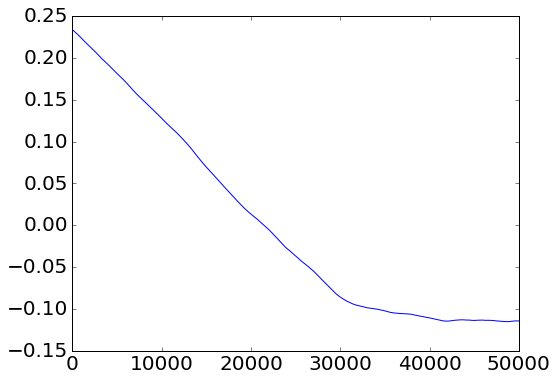

In [43]:
header, [t, E, M] = ReadFile(data_dir + "M_100_1.500.dat", 1, " ")
print(header)
m = M/(header['L']**2)
m -= np.mean(m)
m_hat = np.fft.fft(m)
m_hat_abs = np.abs(m_hat)**2
corr = np.fft.ifft(m_hat_abs)
corr /= M.size
corr = np.real(corr)
print(corr[:int(M.size/2)])
fig, ax = plt.subplots()
ax.plot(t[:int(M.size/2)], corr[:int(M.size/2)])
plt.show()

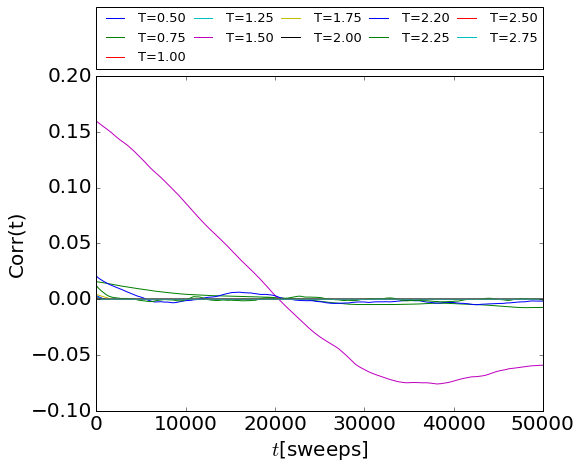

In [42]:
files = os.listdir(data_dir)
M_100_files = []
for element in files:
    if element[:5] == "M_100":
        M_100_files.append(data_dir + element)

fig, ax = plt.subplots()
ax.set_xlabel(r"$t$[sweeps]")
ax.set_ylabel(r"Corr(t)")
for element in M_100_files:
    header, [t, E, M] = ReadFile(element, 1, " ")
    m = np.abs(M/(header['L']**2))
    m -= np.mean(m)
    m_hat = np.fft.fft(m)
    m_hat_abs = np.abs(m_hat)**2
    corr = np.fft.ifft(m_hat_abs)
    corr /= M.size
    corr = np.real(corr)
    ax.plot(t[:int(M.size/2)], corr[:int(M.size/2)], label="T=%.2f" % header["T"])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
          borderaxespad=0., fontsize="13")
plt.show()

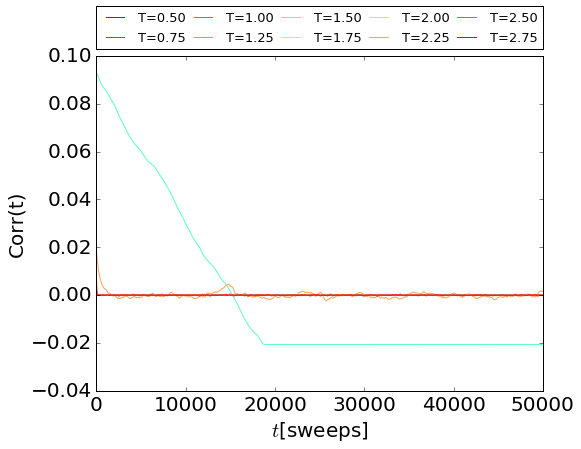

In [45]:
files = os.listdir(data_dir)
M_50_files = []
for element in files:
    if element[:5] == "M_50_":
        M_50_files.append(data_dir + element)

fig, ax = plt.subplots()
ax.set_xlabel(r"$t$[sweeps]")
ax.set_ylabel(r"Corr(t)")
NUM_COLORS = len(M_50_files)
color=iter(plt.cm.rainbow(np.linspace(0,1,NUM_COLORS)))
for element in M_50_files:
    header, [t, E, M] = ReadFile(element, 1, " ")
    m = np.abs(M/(header['L']**2))
    m -= np.mean(m)
    m_hat = np.fft.fft(m)
    m_hat_abs = np.abs(m_hat)**2
    corr = np.fft.ifft(m_hat_abs)
    corr /= M.size
    corr = np.real(corr)
    c=next(color)
    ax.plot(t[:int(M.size/2)], corr[:int(M.size/2)], c=c, label="T=%.2f" % header["T"])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
          borderaxespad=0., fontsize="13")
plt.show()

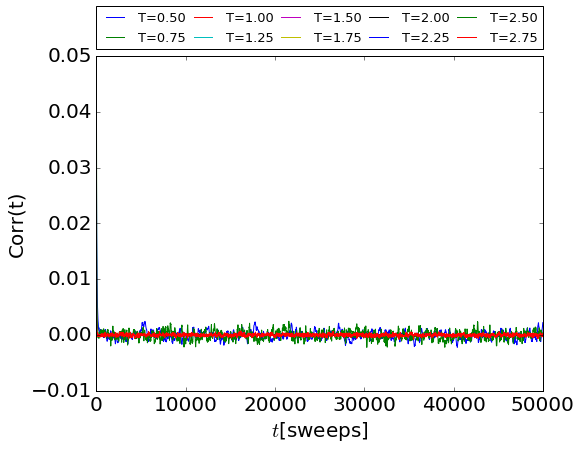

In [46]:
files = os.listdir(data_dir)
M_20_files = []
for element in files:
    if element[:5] == "M_20_":
        M_20_files.append(data_dir + element)

fig, ax = plt.subplots()
ax.set_xlabel(r"$t$[sweeps]")
ax.set_ylabel(r"Corr(t)")
for element in M_20_files:
    header, [t, E, M] = ReadFile(element, 1, " ")
    m = np.abs(M/(header['L']**2))
    m -= np.mean(m)
    m_hat = np.fft.fft(m)
    m_hat_abs = np.abs(m_hat)**2
    corr = np.fft.ifft(m_hat_abs)
    corr /= M.size
    corr = np.real(corr)
    ax.plot(t[:int(M.size/2)], corr[:int(M.size/2)], label="T=%.2f" % header["T"])
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=5, mode="expand", 
          borderaxespad=0., fontsize="13")
plt.show()

# $\langle m \rangle$(T)

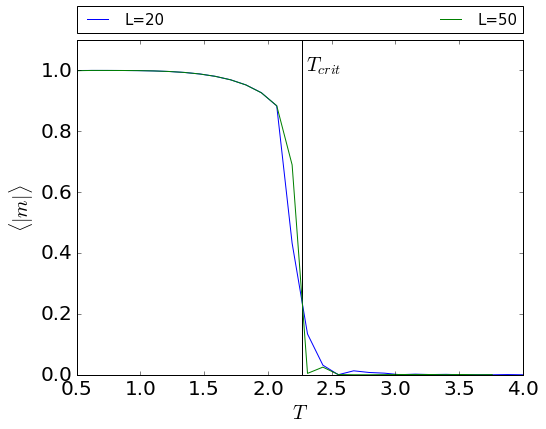

In [120]:
header, data = ReadFile(data_dir + "T_crit.dat", 0, " ")

font = {'size': 20}

data = SplitData(0, data)
fig, ax = plt.subplots()
ax.set_xlabel(r"$T$")
ax.set_ylabel(r"$\langle\vert m \vert\rangle$")
ax.vlines(2.27, 0, 1.1)
ax.text(2.3, 1., r"$T_{crit}$", fontdict=font)
for element in data:
    L = element[0][0]
    m = np.abs(element[2])/L**2
    ax.plot(element[1], np.abs(element[2])/L**2, label="L=%d" %L)
ax.set_xlim(0.5, 4.)
ax.set_ylim(0., 1.1)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", 
          borderaxespad=0., fontsize="15")
plt.show()

# $\chi(T)$

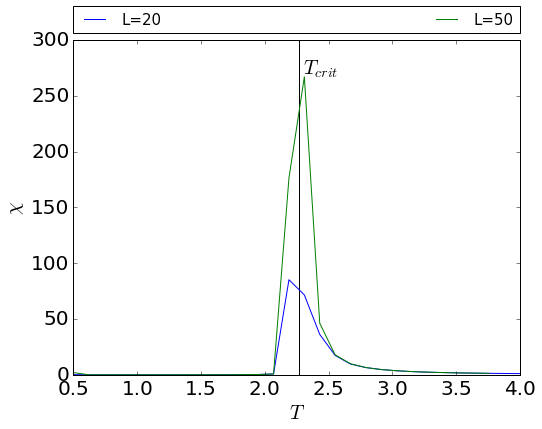

In [119]:
header, data = ReadFile(data_dir + "T_crit.dat", 0, " ")

font = {'size': 20}

data = SplitData(0, data)
fig, ax = plt.subplots()
ax.set_xlabel(r"$T$")
ax.set_ylabel(r"$\chi$")
ax.vlines(2.27, 0, 300)
ax.text(2.3, 270, r"$T_{crit}$", fontdict=font)
for element in data:
    L = element[0][0]
    chi = element[3]/element[1]/L**2
    ax.plot(element[1], chi, label="L=%d" %L)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=3, mode="expand", 
          borderaxespad=0., fontsize="15")
plt.show()

# Finitse-size scaling

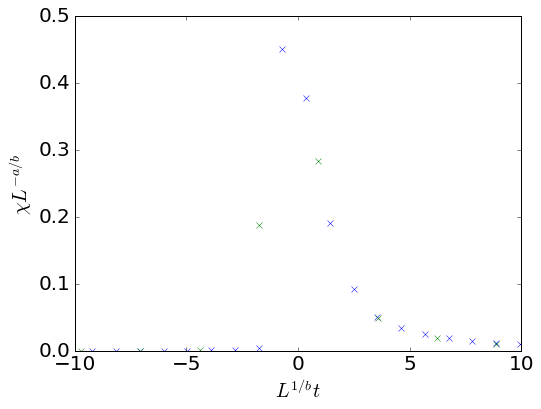

In [114]:
T_crit = 2.269
a = 7/4
b = 1

header, data = ReadFile(data_dir + "T_crit.dat", 0, " ")
data = SplitData(0, data)
fig, ax = plt.subplots()
ax.set_ylabel(r"$\chi L^{-a/b}$")
ax.set_xlabel(r"$L^{1/b} t$")
for element in data:
    L = element[0][0]
    chi = element[3]/element[1]/L**2
    t = (element[1] - T_crit)/T_crit
    ax.plot(L**(1/b)*t ,chi*L**(-a/b), 'x')
ax.set_xlim(-10., 10.)
plt.show()